## 实例：随机森林在乳腺癌数据上的调参

* 视频：https://www.bilibili.com/video/BV1vJ41187hk?t=14.1&p=16
* 文档：https://www.yuque.com/huangzhongqing/sklearn/pgkp5d#yH6ay


In [2]:
from sklearn.datasets import load_breast_cancer # 乳腺癌数据集
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV # 网格搜索 调参
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
data = load_breast_cancer()
data
data.data.shape
data.target
#可以看到，乳腺癌数据集有569条记录，30个特征，单看维度虽然不算太高，但是样本量非常少。
# 过拟合的情况可能存在。

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [4]:
# 进行一次简单的建模，看看模型本身在数据集上的效果
rfc = RandomForestClassifier(n_estimators=100,random_state=90)
score_pre = cross_val_score(rfc,data.data,data.target,cv=10).mean() # 10次结果求均值
score_pre
#这里可以看到，随机森林在乳腺癌数据上的表现本就还不错，在现实数据集上，基本上不可能什么都不调就看到95%以
# 上的准确率

0.9648809523809524

## step1: 学习曲线调参，举例n_estimators
随机森林调整的第一步：无论如何先来调n_estimators

0.9631265664160402 71


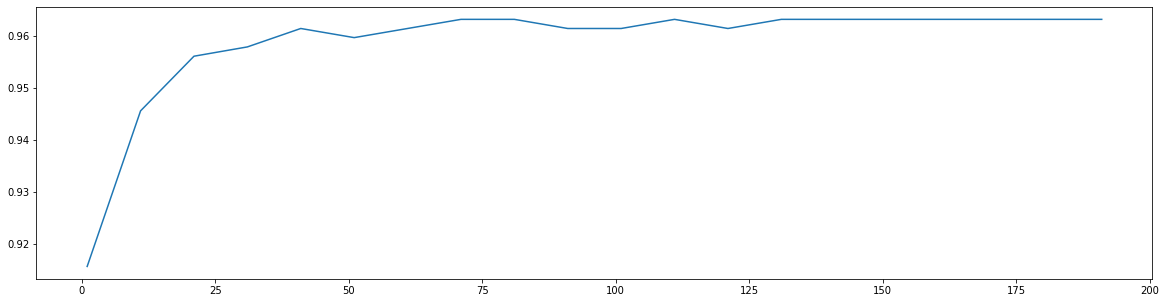

In [5]:
# 通过学习曲线调参

scorel = []
for i in range(0,200,10):
    rfc = RandomForestClassifier(n_estimators=i+1,
                                    n_jobs=-1,
                                    random_state=90)
    score = cross_val_score(rfc,data.data,data.target,cv=10).mean()
    scorel.append(score)
print(max(scorel),(scorel.index(max(scorel))*10)+1) # 最大值和对应索引
plt.figure(figsize=[20,5])
plt.plot(range(1,201,10),scorel) # 横纵坐标
plt.show()
#list.index([object])
#返回这个object在列表list中的索引

### 从曲线跑出的结果中选取一个更小的区间，再跑曲线

0.9613721804511279 41


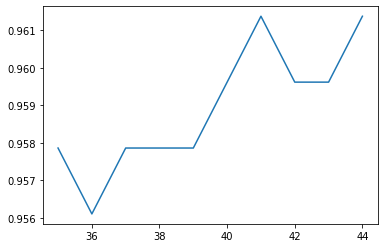

In [9]:
#  从曲线跑出的结果中选取一个更小的区间，再跑曲线
scorel = []
for i in range(35,45):
    rfc = RandomForestClassifier(n_estimators=i,
                                n_jobs=-1,
                                random_state=90)
    score = cross_val_score(rfc,data.data,data.target,cv=10).mean()
    scorel.append(score)
print(max(scorel),([*range(35,45)][scorel.index(max(scorel))]))
# plt.figure(figsize=[20,5])
plt.plot(range(35,45),scorel)
plt.show()

# 有一些参数是没有参照的，很难说清一个范围，这种情况下我们使用学习曲线，看趋势
# 从曲线跑出的结果中选取一个更小的区间，再跑曲线

## step2: 网格搜索调参

* 开始按照参数对模型整体准确率的影响程度调参，首先max_depth

### max_depth

In [6]:
#调整max_depth
param_grid = {'max_depth':np.arange(1, 20, 1)}
# 一般根据数据的大小来进行一个试探，乳腺癌数据很小，所以可以采用1~10，或者1~20这样的试探
# 但对于像digit recognition那样的大型数据来说，我们应该尝试30~50层深度（或许还不足够
# 更应该画出学习曲线，来观察深度对模型的影响
rfc = RandomForestClassifier(n_estimators=39
                            ,random_state=90
                            )
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=39, random_state=90),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [7]:
GS.best_params_

{'max_depth': 6}

In [8]:
GS.best_score_

0.9631265664160402

### max_features

In [10]:
# 调整max_features
param_grid = {'max_features':np.arange(5,30,1)}
# """
# max_features是唯一一个即能够将模型往左（低方差高偏差）推，也能够将模型往右（高方差低偏差）推的参数。我
# 们需要根据调参前，模型所在的位置（在泛化误差最低点的左边还是右边）来决定我们要将max_features往哪边调。
# 现在模型位于图像左侧，我们需要的是更高的复杂度，因此我们应该把max_features往更大的方向调整，可用的特征
# 越多，模型才会越复杂。max_features的默认最小值是sqrt(n_features)，因此我们使用这个值作为调参范围的
# 最小值。
# """
rfc = RandomForestClassifier(n_estimators=39
                            ,random_state=90
                            )
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=39, random_state=90),
             param_grid={'max_features': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29])})

In [ ]:
GS.best_params_

In [12]:
GS.best_score_

0.968421052631579

### min_samples_leaf

In [13]:
#调整min_samples_leaf
param_grid={'min_samples_leaf':np.arange(1, 1+10, 1)}

#对于min_samples_split和min_samples_leaf,一般是从他们的最小值开始向上增加10或20
#面对高维度高样本量数据，如果不放心，也可以直接+50，对于大型数据，可能需要200~300的范围
#如果调整的时候发现准确率无论如何都上不来，那可以放心大胆调一个很大的数据，大力限制模型的复杂度

rfc = RandomForestClassifier(n_estimators=39
                            ,random_state=90
                            )
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=39, random_state=90),
             param_grid={'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])})

In [14]:
GS.best_params_

{'min_samples_leaf': 4}

In [15]:
GS.best_score_

0.9613721804511279

## 最终测试（汇总各个参数）

In [16]:
rfc2 = RandomForestClassifier(n_estimators=41
                            ,random_state=90
                            ,criterion="gini"
                            ,min_samples_split=8
                            ,min_samples_leaf=1
                            ,max_depth=11 #《《《《《《《《《《《
                            ,max_features=6 #《《《《《《《《《《《
                            ,max_leaf_nodes=36
                            )
score2 = cross_val_score(rfc2,data.data,data.target,cv=10).mean()
score2

0.9596177944862155